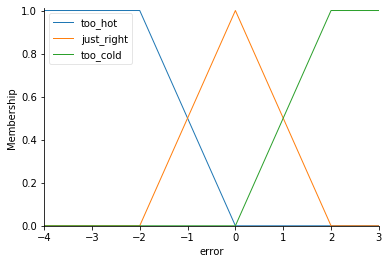

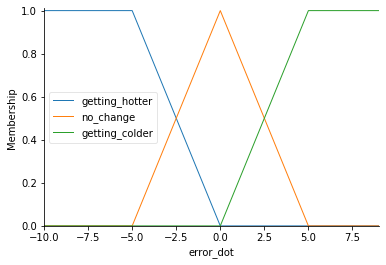

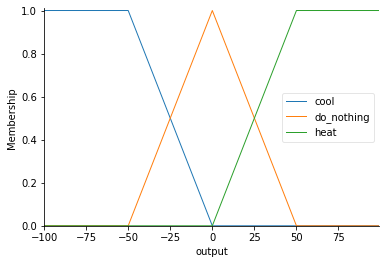

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#import matplotlib.pyplot as plt

# Creation des entres et sorties de la logique floue
error = ctrl.Antecedent(np.arange(-4, 4, 1), 'error')
error_dot = ctrl.Antecedent(np.arange(-10, 10, 1), 'error_dot')
output = ctrl.Consequent(np.arange(-100, 100, 1) , 'output')

# Creation automatique de pics possibles 
#temperature.automf(7)
#humidite.automf(7)

error['too_hot'] = fuzz.trapmf(error.universe, [-4, -4, -2, 0])
error['just_right'] = fuzz.trimf(error.universe, [-2, 0, 2])
error['too_cold'] = fuzz.trapmf(error.universe, [0, 2, 4, 4])


error_dot['getting_hotter'] = fuzz.trapmf(error_dot.universe, [-10, -10 , -5, 0])
error_dot['no_change'] = fuzz.trimf(error_dot.universe,[-5, 0, 5])
error_dot['getting_colder'] = fuzz.trapmf(error_dot.universe, [0, 5 , 10, 10])

output['cool'] = fuzz.trapmf(output.universe, [-100, -100, -50, 0])
output['do_nothing'] = fuzz.trimf(output.universe, [-50, 0, 50])
output['heat'] = fuzz.trapmf(output.universe, [0, 50, 100, 100])

error.view()
error_dot.view()
output.view()


In [3]:
#Cold
rule1 = ctrl.Rule(error['too_cold'] & error_dot['getting_colder'], output['heat'])
rule2 = ctrl.Rule(error['too_cold'] & error_dot['no_change'], output['heat'])
rule3 = ctrl.Rule(error['too_cold'] & error_dot['getting_hotter'], output['heat'])

#just right
rule4 = ctrl.Rule(error['just_right'] & error_dot['getting_colder'], output['heat'])
rule5 = ctrl.Rule(error['just_right'] & error_dot['no_change'], output['do_nothing'])
rule6 = ctrl.Rule(error['just_right'] & error_dot['getting_hotter'], output['cool'])

#hot
rule7 = ctrl.Rule(error['too_hot'] & error_dot['getting_colder'], output['cool'])
rule8 = ctrl.Rule(error['too_hot'] & error_dot['no_change'], output['cool'])
rule9 = ctrl.Rule(error['too_hot'] & error_dot['getting_hotter'], output['cool'])

#Add all rules in a rules Array
rules = [rule1, rule2, rule3, rule4 ,rule5, rule6, rule7, rule8, rule9]

#Push rules to system
output_ctrl =  ctrl.ControlSystem(rules)




-47.566079295154076


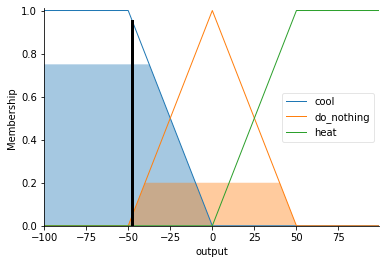

In [6]:
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

output_simulation.input['error'] = -1.5
output_simulation.input['error_dot'] = -4

output_simulation.compute()

output.view(sim=output_simulation)

print(output_simulation.output['output'])

-45.47760076252723


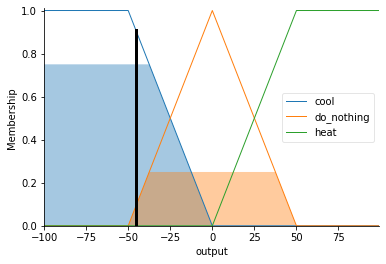

In [7]:
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

output_simulation.input['error'] = -1.5
output_simulation.input['error_dot'] = -1

output_simulation.compute()

output.view(sim=output_simulation)

print(output_simulation.output['output'])

16.219036634261546


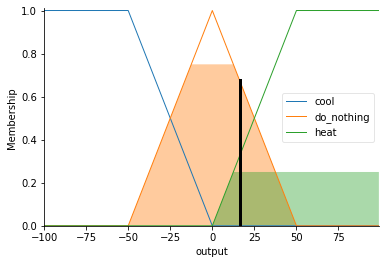

In [8]:
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

output_simulation.input['error'] = .5
output_simulation.input['error_dot'] = 1

output_simulation.compute()

output.view(sim=output_simulation)

print(output_simulation.output['output'])

47.01113089937667


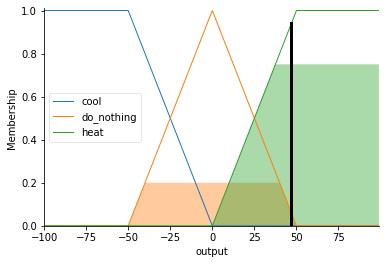

In [9]:
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

output_simulation.input['error'] = .5
output_simulation.input['error_dot'] = 4

output_simulation.compute()

output.view(sim=output_simulation)

print(output_simulation.output['output'])